In [10]:
from standardInclude import *

Error in callback <bound method CaptureDrawnPrimitives._post_execute of <JupyROOT.utils.CaptureDrawnPrimitives object at 0x7f9b6e0ec978>> (for post_execute):


SystemError: void TPad::SaveAs(const char* filename = "", const char* option = "") =>
    problem in C++; program state has been reset

In [11]:
rmagic = 7112
rmin = -45. + rmagic
rmax = 45. + rmagic
rbins = 21
rstep = (rmax - rmin)/rbins

vmin = -45.
vmax = 45.
vbins = 21
vstep = (vmax - vmin)/vbins

thetamin = 0.
thetamax = 2*r.TMath.Pi()
thetabins = 72
thetastep = (thetamax - thetamin)/thetabins


In [26]:
rs = []

for rbin in range(rbins):
    if(rbin > 0):
        break
    for vbin in range(vbins):
        for thetabin in range(thetabins):
            #if(thetabin > 0):
            #    break
            binNumber = rbin*100000+vbin*100+thetabin
            binstring = str(rbin).zfill(3)+"_"+str(vbin).zfill(3)+"_"+str(thetabin).zfill(3)
            #print("Starting Bin:", binstring)

            rlow = rmin + rstep*(rbin)
            rhigh = rmin + rstep*(rbin+1)
            vlow = vmin + vstep*(vbin)
            vhigh = vmin + vstep*(vbin+1)
            thetalow = thetamin + thetastep*(thetabin)
            thetahigh = thetamin + thetastep*(thetabin+1)
            
        rs.append((vlow,vhigh))

In [27]:
print(rs)

[(-45.0, -40.714285714285715), (-40.714285714285715, -36.42857142857143), (-36.42857142857143, -32.14285714285714), (-32.14285714285714, -27.857142857142858), (-27.857142857142858, -23.571428571428573), (-23.571428571428573, -19.285714285714285), (-19.285714285714285, -15.0), (-15.0, -10.714285714285715), (-10.714285714285715, -6.428571428571431), (-6.428571428571431, -2.142857142857146), (-2.142857142857146, 2.142857142857139), (2.142857142857139, 6.428571428571431), (6.428571428571431, 10.714285714285715), (10.714285714285715, 15.0), (15.0, 19.285714285714278), (19.285714285714278, 23.57142857142857), (23.57142857142857, 27.85714285714286), (27.85714285714286, 32.14285714285714), (32.14285714285714, 36.42857142857143), (36.42857142857143, 40.71428571428571), (40.71428571428571, 45.0)]


In [14]:
f = r.TFile("./data/PDF_MuonUnscaled_Energies_1700_3500_Calo24_May16.root")
f.ls()
c = f.Get("c")
print([x for x in c.GetListOfPrimitives()])
h = c.GetPrimitive("PDF_AllEnergies").Clone()
h.SetDirectory(0)

[<ROOT.TH3D object ("PDF_AllEnergies") at 0x7fffbf394ae0>, <ROOT.TPaveText object ("title") at 0x7fffbf38b020>]
TFile**		./data/PDF_MuonUnscaled_Energies_1700_3500_Calo24_May16.root	
 TFile*		./data/PDF_MuonUnscaled_Energies_1700_3500_Calo24_May16.root	
  KEY: TCanvas	c;1	c


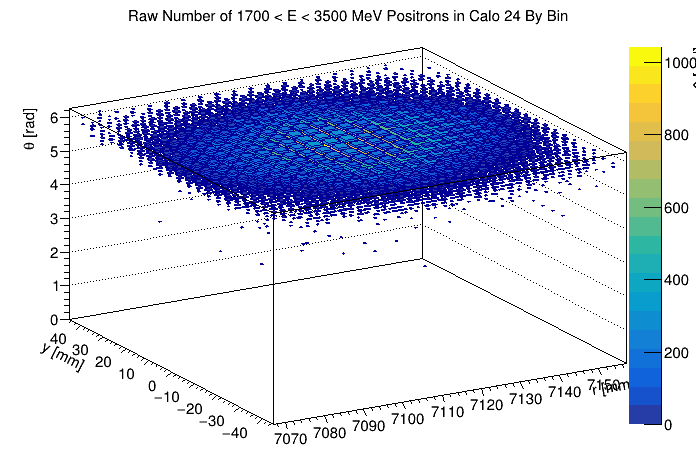

In [15]:
c = r.TCanvas()
h.Draw("lego2z")
c.Draw()

In [28]:
nbinsR = h.GetYaxis().GetNbins()
binWidth = h.GetYaxis().GetBinWidth(1)
trueBins = []
for i in range(1,nbinsR+1):
    binCenter = h.GetYaxis().GetBinCenter(i)
    trueBins.append( (binCenter - binWidth/2, binCenter + binWidth/2) )

In [29]:
for i, tbi in enumerate(trueBins):
    calcBins = rs[i]
    print(tbi[0] - calcBins[0], tbi[1] - calcBins[1])

0.0 7.105427357601002e-15
0.0 7.105427357601002e-15
0.0 0.0
0.0 3.552713678800501e-15
0.0 0.0
0.0 -3.552713678800501e-15
0.0 0.0
0.0 0.0
0.0 0.0
0.0 4.440892098500626e-16
0.0 8.881784197001252e-16
-4.440892098500626e-16 -7.105427357601002e-15
0.0 0.0
0.0 0.0
0.0 7.105427357601002e-15
0.0 -7.105427357601002e-15
0.0 -7.105427357601002e-15
0.0 7.105427357601002e-15
0.0 0.0
0.0 1.4210854715202004e-14
0.0 0.0
